In [3]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report



# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

## Heart Dataset 

In this Assignment we will work with some patients dataset. 

We have access to 303 patients data. The features are listed below. 

In [4]:
# Your code here
heart_df = pd.read_csv("Heart (2).csv")
heart_df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


**Age:** The person’s age in years

**Sex:** The person’s sex (1 = male, 0 = female)

**ChestPain:** chest pain type

* Value 0: asymptomatic
* Value 1: atypical angina
* Value 2: non-anginal pain
* Value 3: typical angina

**RestBP:** The person’s resting blood pressure (mm Hg on admission to the hospital)

**Chol:** The person’s cholesterol measurement in mg/dl

**Fbs:** The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
restecg: resting electrocardiographic results

* Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
* Value 1: normal
* Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

**RestECG:** The person’s maximum heart rate achieved

**MaxHR:** Exercise induced angina (1 = yes; 0 = no)

**Oldpeak:** ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)

**Slope:** the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping

* 0: downsloping; 
* 1: flat; 
* 2: upsloping

**Ca:** The number of major vessels (0–3)

**Thal:** A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously

* Value 1: fixed defect (no blood flow in some part of the heart)
* Value 2: normal blood flow
* Value 3: reversible defect (a blood flow is observed but it is not normal)

**Target:** Heart disease (1 = no, 0= yes)

# Task - 1 (5 points)
We want to use logistic regerssion to perdict if the patients will have heart problems or not. The column "Target" in our datasets includes data about heart diseases. If the patient had heart disease we have a 1 and if not a zero. 

Prepare your data set for predicting heart disease ("Target" column) out of 3 features:

* Age of the patient (Column **"Age"**)
* Gender of the patient (male or female - Column **"Sex"**)
* Cholestrol level of the patient (Column **"Chol"**) 


Split your data into 80% traning data and 20% test data. 

In [5]:
le = LabelEncoder()
heart_df['ChestPain'] = le.fit_transform(heart_df['ChestPain'])
heart_df['Thal'] = le.fit_transform(heart_df['Thal'])
heart_df['Target'] = le.fit_transform(heart_df['Target'])

heart_df.dropna(subset=['Ca'],inplace=True)

x = heart_df.drop(['Target'],axis='columns')
y = heart_df['Target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, train_size=0.8)

In [6]:
print(heart_df.head())


   Age  Sex  ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
0   63    1          3     145   233    1        2    150      0      2.3   
1   67    1          0     160   286    0        2    108      1      1.5   
2   67    1          0     120   229    0        2    129      1      2.6   
3   37    1          1     130   250    0        0    187      0      3.5   
4   41    0          2     130   204    0        2    172      0      1.4   

   Slope   Ca  Thal  Target  
0      3  0.0     0       0  
1      2  3.0     1       1  
2      2  2.0     2       1  
3      3  0.0     1       0  
4      1  0.0     1       0  


# Task 2 - (10 points)

Generate a logistic regression model using your training data. 

Print out the accuracy if your model. 

In [7]:
model = LogisticRegression()
model.fit(x_train, y_train)
print(model.score(x_test, y_test))



0.8


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Task 3 - (5 points)


Generate the classification report for your Logistic regresion model and interpret your results regarding precision, recall and f1-score. 


In [8]:
print(classification_report(y_test, model.predict(x_test)))


              precision    recall  f1-score   support

           0       0.70      0.88      0.78        24
           1       0.90      0.75      0.82        36

    accuracy                           0.80        60
   macro avg       0.80      0.81      0.80        60
weighted avg       0.82      0.80      0.80        60



Our precision score means on average 83% of our data retrieved are relevant.
Our recall score mean on average 82% of our data that is relevant are retrieved.
The f1 score computes the average between the precision and recall and it means 82% of the predictions were correct.

# Task 4 - Optional Task (2 extra points)


Which other feature of your data can you use to improve your prediction? Build other models and improve your prediction. 


We can use a cross validation check or GridSearchCV to see which model and which parameters produces the greatest accuracy score 

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
y_predicted = model.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)
cm

array([[21,  3],
       [ 9, 27]])

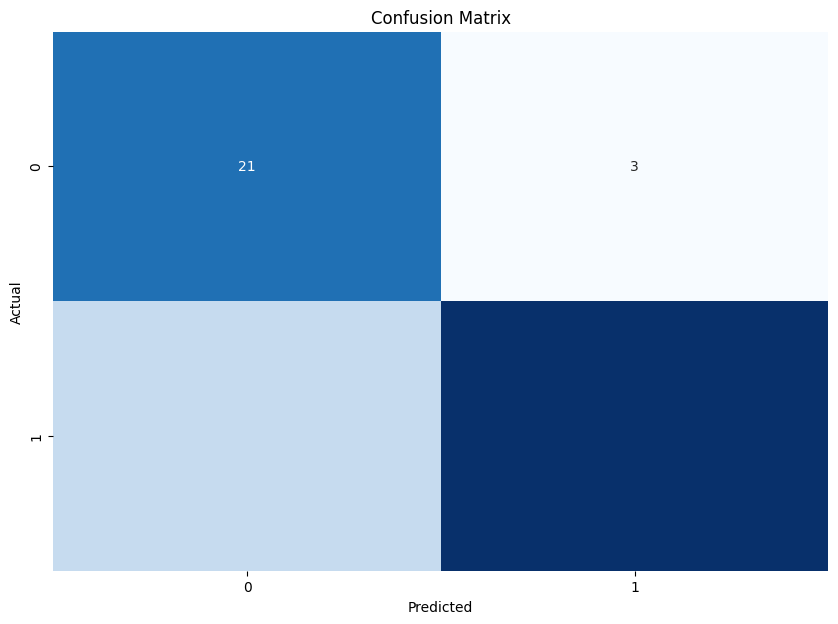

In [15]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
